# SIGNAL PROCESSING TP4 - M2 AI
## To Do: image denoising in wavelet domain

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

---

## IMPORT

In [66]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import librosa

In [67]:
noise1, sr1 = librosa.load('noise1.wav', sr=None)
noise2, sr2 = librosa.load('noise2.wav', sr=None)
noise3, sr3 = librosa.load('noise3.wav', sr=None)

original_image = Image.open('barbara.jpg')
original_image_np = np.array(original_image)
image_flattened = original_image_np.flatten()

SNR_LEVELS = [0, 10, 20]
NOISES = [noise1, noise2, noise3]

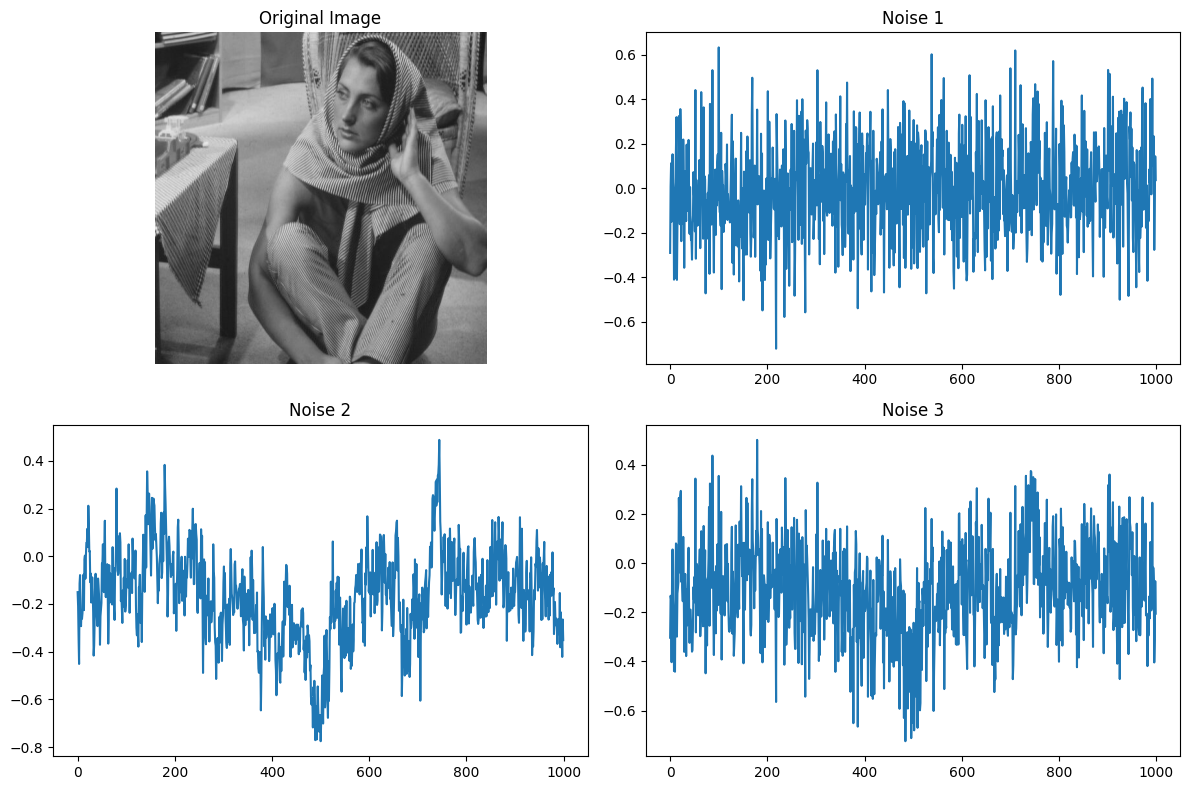

In [31]:
plt.figure(figsize=(12, 8))
# Original Image plot (top-left)
plt.subplot(2, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noise 1 plot (top-right)
plt.subplot(2, 2, 2)
plt.plot(noise1[:1000])
plt.title("Noise 1")

# Noise 2 plot (bottom-left)
plt.subplot(2, 2, 3)
plt.plot(noise2[:1000])
plt.title("Noise 2")

# Noise 3 plot (bottom-right)
plt.subplot(2, 2, 4)
plt.plot(noise3[:1000])
plt.title("Noise 3")

plt.tight_layout()
plt.show()

## Simulate a noisy version of the image using the noises at various SNR Level (0 db, 10 dB and 20 dB)

In order to add a noise $n$ with a certain SNR to a signal $x$, we need to introduce a scaling factor parameter, here alpha:

$$
\text{SNR} = 10*\log_{10}(\frac{||x||_{2}^{2}}{\alpha^2||n||_{2}^{2}})
$$
And by solving the equation for $\alpha$, we find that :
$$
\alpha = \sqrt{\frac{||x||_{2}^{2}}{10^{\frac{\text{SNR}}{10}}||n||_{2}^{2}}}
$$
Therefore the noisy signal $y$ for a given level of SNR will be:
$$
y = x+\alpha *n
$$

In [64]:
def add_noise(signal, noise, snr_db):
    """
    Add noise to the signal with a given SNR value
    Args:
        signal: The clean signal.
        noise: The noise signal.
        snr_db: Desired SNR in dB.
    Returns:
        Noisy signal.
    """

    # Calculate the power of the signal and the noise
    spow = np.mean(signal**2)
    npow = np.mean(noise**2)
    
    # Calculate the scaling factor for noise
    scale_factor = np.sqrt(spow / (npow * 10 ** (snr_db / 10) ) )
    
    # Scale the noise and add it to the signal
    noisy_signal = signal + scale_factor * noise
    
    return noisy_signal

def add_noise_to_image(image, noise):
    """Add noise to the RGB image. If noise is shorter, loop it. If it's longer, trim it."""
    total_pixels = image.shape[0] * image.shape[1] * image.shape[2]
    noise_to_use = np.tile(noise, total_pixels // len(noise) + 1)[:total_pixels]
    noisy_image = image + noise_to_use.reshape(image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)
    
    return noisy_image.astype(np.uint8)

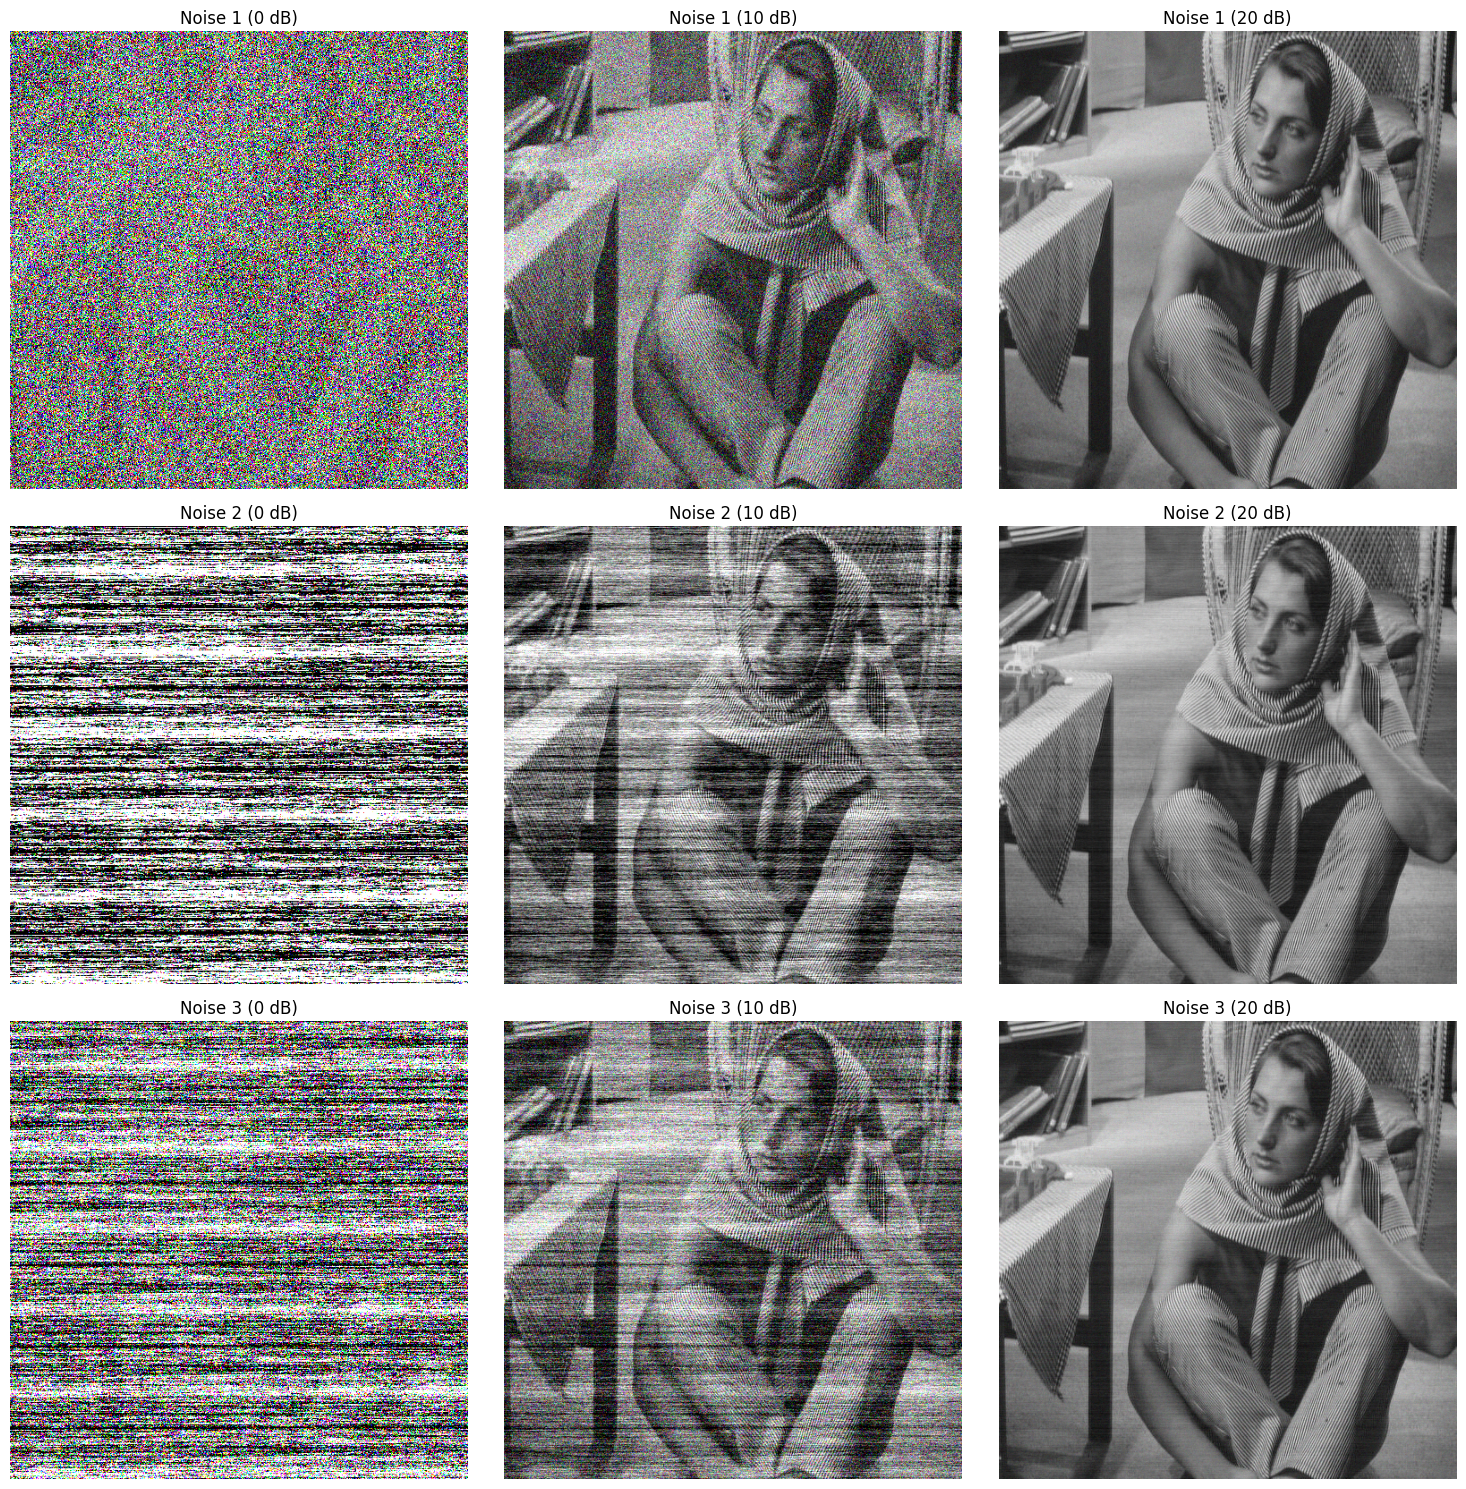

In [65]:
plt.figure(figsize=(15, 15))

for i, noise in enumerate(NOISES):
    for j, snr in enumerate(SNR_LEVELS):
        # Adjust the noise for the current SNR
        adjusted_noise = adjust_noise_for_snr(image_flattened, noise, snr)
        # Add the adjusted noise to the image
        noisy_image = add_noise_to_image(original_image_np, adjusted_noise)
        
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.imshow(noisy_image, cmap='gray')
        plt.title(f"Noise {i+1} ({snr} dB)")
        plt.axis('off')

plt.tight_layout()
plt.show()

## Denoise the image by performing hard thresholding and soft thresholding in the wavelet domain

## Discuss the parameters (wavelet type, number of level, type of thresholding)
